In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading reviews dataset

In [2]:
dt_reviews = pd.read_csv("../dataset/olist_order_reviews_dataset.csv", index_col=0)

- <b>review_id</b>: unique review identifier
- <b>order_id</b>: unique order identifier
- <b>review_score</b>: Note ranging from 1 to 5 given by the customer on a satisfaction survey.
- <b>review_comment_title</b>: Comment title from the review left by the customer, in Portuguese.
- <b>review_comment_message</b>: Comment message from the review left by the customer, in Portuguese.
- <b>review_creation_date</b>: Shows the date in which the satisfaction survey was sent to the customer.
- <b>review_answer_timestamp</b>: Shows satisfaction survey answer timestamp.

In [3]:
dt_reviews.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_id,,,,,,
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### First and last review

In [4]:
dt_reviews['review_answer_timestamp'].min()

'2016-10-07 18:32:28'

In [5]:
dt_reviews['review_answer_timestamp'].max()

'2018-10-29 12:27:35'

### Review Scores

In [6]:
dt_reviews['review_score'].isnull().any()

False

In [7]:
dt_reviews['review_score'].describe()

count    100000.000000
mean          4.070890
std           1.359663
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

In [8]:
dt_reviews['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [9]:
dt_reviews_no_na = dt_reviews[['review_score', 'review_comment_message']].dropna()

In [10]:
dt_reviews_no_na.shape

(41753, 2)

In [11]:
dt_reviews_count = pd.concat([dt_reviews['review_score'].value_counts(), dt_reviews_no_na['review_score'].value_counts()], axis = 1)

In [12]:
dt_reviews_count.columns = ['all_reviews','reviews_with_comments']

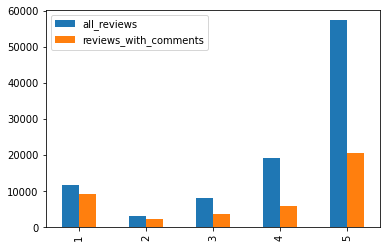

In [13]:
dt_reviews_count.plot.bar()

## Review words

In [14]:
import nltk
import gensim
from gensim.parsing.preprocessing import strip_non_alphanum
from gensim.parsing.preprocessing import strip_numeric
import numpy as np

In [15]:
dt_reviews_no_na.review_comment_message.head()

review_id
e64fb393e7b32834bb789ff8bb30750e                Recebi bem antes do prazo estipulado.
f7c4243c7fe1938f181bec41a392bdeb    Parabéns lojas lannister adorei comprar pela I...
8670d52e15e00043ae7de4c01cc2fe06    aparelho eficiente. no site a marca do aparelh...
4b49719c8a200003f700d3d986ea1a19      Mas um pouco ,travando...pelo valor ta Boa.\r\n
3948b09f7c818e2d86c9a546758b2335    Vendedor confiável, produto ok e entrega antes...
Name: review_comment_message, dtype: object

In [16]:
dt_reviews_no_na['review_comment_message'] = dt_reviews_no_na['review_comment_message'].apply(
    lambda x: gensim.utils.deaccent(strip_numeric(strip_non_alphanum(x)).lower()))

In [17]:
dt_reviews_no_na['review_comment_message'].head()

review_id
e64fb393e7b32834bb789ff8bb30750e                recebi bem antes do prazo estipulado 
f7c4243c7fe1938f181bec41a392bdeb    parabens lojas lannister adorei comprar pela i...
8670d52e15e00043ae7de4c01cc2fe06    aparelho eficiente  no site a marca do aparelh...
4b49719c8a200003f700d3d986ea1a19        mas um pouco  travando   pelo valor ta boa   
3948b09f7c818e2d86c9a546758b2335    vendedor confiavel  produto ok e entrega antes...
Name: review_comment_message, dtype: object

In [18]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /home/paulo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
review_stopwords = dt_reviews_no_na['review_comment_message'].apply(
    lambda x: [w for w in x.split() if w not in stopwords])

In [26]:
dt_reviews_no_na['stopwords'] = review_stopwords

In [27]:
all_words = np.concatenate(dt_reviews_no_na.stopwords.values)

In [28]:
pd.Series(all_words).value_counts().head(10)

produto      18867
nao          12764
prazo         8543
entrega       6687
antes         5656
chegou        5643
recebi        5476
bom           4637
recomendo     4363
entregue      3899
dtype: int64

In [29]:
best_reviews = dt_reviews_no_na.loc[dt_reviews_no_na['review_score'].isin([4,5])]
all_words_best = np.concatenate(best_reviews.stopwords.values)
best_reviews.shape

(26680, 3)

In [31]:
pd.Series(all_words_best).value_counts().head(10)

produto      10730
prazo         7101
antes         5296
entrega       4677
chegou        4035
bom           4022
recomendo     3884
bem           2706
otimo         2389
nao           2238
dtype: int64

In [30]:
bad_reviews = dt_reviews_no_na.loc[dt_reviews_no_na['review_score'].isin([1,2])]
all_words_bad = np.concatenate(bad_reviews.stopwords.values)
all_words_bad.shape

(124558,)

In [32]:
pd.Series(all_words_bad).value_counts().head(10)

nao         8889
produto     6495
recebi      3431
comprei     1982
veio        1605
entrega     1503
ate         1495
ainda       1453
entregue    1410
chegou      1239
dtype: int64

In [82]:
words_frequency = pd.concat(
    [pd.Series(all_words).value_counts(), pd.Series(all_words_best).value_counts(),], axis=1).dropna()
words_frequency.columns = ['frequency_all', 'frequency_4_5']

#words_frequency = words_frequency.loc[words_frequency['frequency_4_5']>=50]

#(words_frequency.frequency_4_5/words_frequency.frequency_all).nlargest(10).plot.barh(figsize=(7,5))

'canguru' in (words_frequency.loc[words_frequency.frequency_4_5==1]
 .frequency_4_5/words_frequency.frequency_all).index.values

True

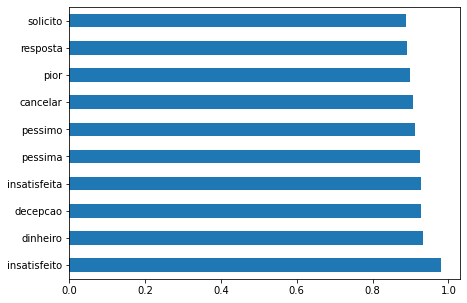

In [37]:
words_frequency = pd.concat(
    [pd.Series(all_words).value_counts(), pd.Series(all_words_bad).value_counts(),], axis=1).dropna()
words_frequency.columns = ['frequency_all', 'frequency_1_2']

words_frequency = words_frequency.loc[words_frequency['frequency_1_2']>=50]

(words_frequency.frequency_1_2/words_frequency.frequency_all).nlargest(10).plot.barh(figsize=(7,5))

In [38]:
from wordcloud import WordCloud

In [55]:
word_cloud_generator = WordCloud(width = 1200, height = 650, background_color='white', collocations = False, normalize_plurals=False)
word_cloud_bad = word_cloud_generator.generate(" ".join(all_words_bad)) 
word_cloud_generator = WordCloud(width = 1200, height = 650, background_color='white', collocations = False, normalize_plurals=False)
word_cloud_all = word_cloud_generator.generate(" ".join(all_words)) 
word_cloud_generator = WordCloud(width = 1200, height = 650, background_color='white', collocations = False, normalize_plurals=False)
word_cloud_best = word_cloud_generator.generate(" ".join(all_words_best)) 

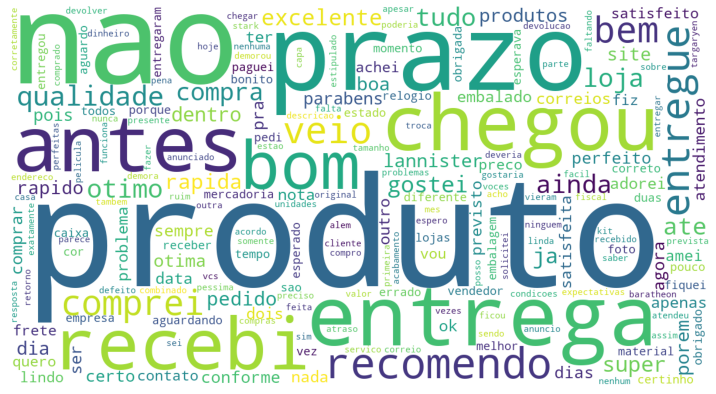

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
axes.axis('off')
axes.imshow(word_cloud_all)

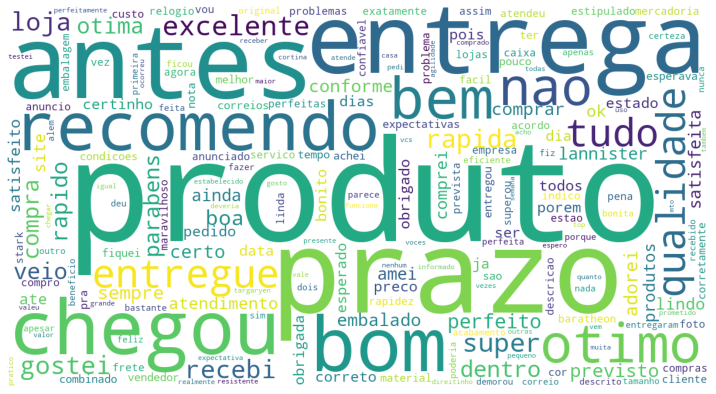

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
axes.axis('off')
axes.imshow(word_cloud_best)

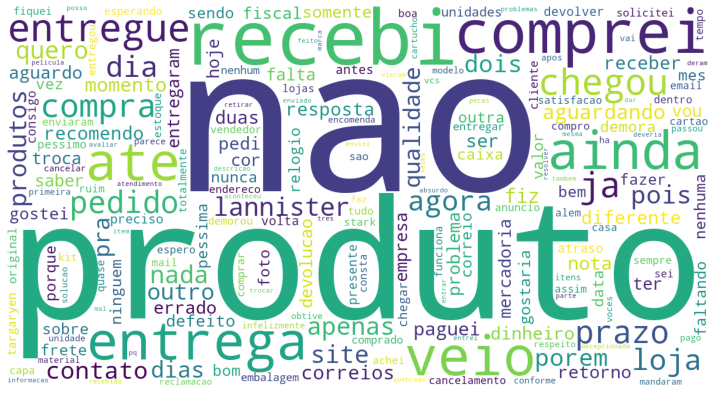

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
axes.axis('off')
axes.imshow(word_cloud_bad)